## 示例：y=w * x
只有一个元素的tensor才能使用.item()转换成标量，否则的话使用.tolist()

predict (before training) 4 1.7094950675964355
	grad: 1.0 2.0 -3.1452524662017822
	grad: 2.0 4.0 -12.329389572143555
	grad: 3.0 6.0 -25.521835327148438
progress: 0 18.093446731567383
	grad: 1.0 2.0 -0.694694995880127
	grad: 2.0 4.0 -2.7232046127319336
	grad: 3.0 6.0 -5.637033462524414
progress: 5 0.8826707005500793
	grad: 1.0 2.0 -0.15343785285949707
	grad: 2.0 4.0 -0.6014766693115234
	grad: 3.0 6.0 -1.2450542449951172
progress: 10 0.043060000985860825
	grad: 1.0 2.0 -0.0338900089263916
	grad: 2.0 4.0 -0.13284873962402344
	grad: 3.0 6.0 -0.2749958038330078
progress: 15 0.0021006304305046797
	grad: 1.0 2.0 -0.007485389709472656
	grad: 2.0 4.0 -0.0293426513671875
	grad: 3.0 6.0 -0.06073951721191406
progress: 20 0.0001024802477331832
	grad: 1.0 2.0 -0.001653432846069336
	grad: 2.0 4.0 -0.006481170654296875
	grad: 3.0 6.0 -0.013415336608886719
progress: 25 4.999201337341219e-06
	grad: 1.0 2.0 -0.00036525726318359375
	grad: 2.0 4.0 -0.0014314651489257812
	grad: 3.0 6.0 -0.002964019775390625

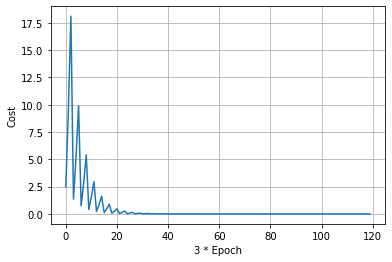

In [75]:
import torch
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = torch.rand(1)
w.requires_grad = True  # 设置需要保存梯度


# 前向，计算预测值
def forward(x):
    return x * w


# 损失函数：可以理解为在计算损失时程序在构建计算图
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2


loss_list = []
print("predict (before training)", 4, forward(4).item())

for epoch in range(40):
    l = torch.tensor([])
    for x, y in zip(x_data, y_data):
        l = loss(x, y)
        l.backward()  # 反向传播，即计算梯度
        loss_list.append(l.item())
        if epoch % 5 == 0:  # 全部日志输出太长了，每五次输出一次
            print('\tgrad:', x, y, w.grad.item())
        w.data = w.data - 0.01 * w.grad.data  # 更新参数
        w.grad.data.zero_()  # 梯度清零，否则梯度会一直累加
    if epoch % 5 == 0:
        print("progress:", epoch, l.item())
print("predict (after training)", 4, forward(4).item())
plt.plot(loss_list)
plt.xlabel('3 * Epoch')
plt.ylabel('Cost')
plt.grid()
plt.show()

## 作业： y = w1 * x^2+w2 * x + b

Predict (before training) 4 tensor([8.5127], grad_fn=<AddBackward0>)
	grad: 1.0 4.0 -5.311059951782227 -5.311059951782227 -5.311059951782227
	grad: 2.0 11.0 -61.471229553222656 -30.735614776611328 -15.367807388305664
	grad: 3.0 22.0 -168.61831665039062 -56.20610809326172 -18.735368728637695
Epoch: 0 Cost: 87.75350952148438
	grad: 1.0 4.0 -0.15020036697387695 -0.15020036697387695 -0.15020036697387695
	grad: 2.0 11.0 0.8120880126953125 0.40604400634765625 0.20302200317382812
	grad: 3.0 22.0 4.562793731689453 1.5209312438964844 0.5069770812988281
Epoch: 5 Cost: 0.06425643712282181
	grad: 1.0 4.0 -0.22160816192626953 -0.22160816192626953 -0.22160816192626953
	grad: 2.0 11.0 -0.4183502197265625 -0.20917510986328125 -0.10458755493164062
	grad: 3.0 22.0 0.6001968383789062 0.20006561279296875 0.06668853759765625
Epoch: 10 Cost: 0.0011118402471765876
	grad: 1.0 4.0 -0.18624448776245117 -0.18624448776245117 -0.18624448776245117
	grad: 2.0 11.0 -0.28656768798828125 -0.14328384399414062 -0.0716419

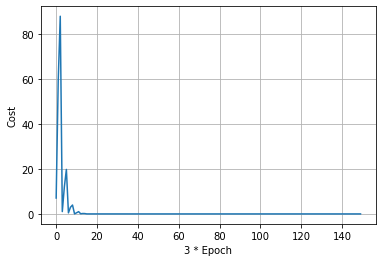

In [74]:
import matplotlib.pyplot as plt
import torch

# 这里真实参数为w1=2 w2=1 b=1。故x=4时，输出预测为37是我们希望的结果
x_data = [1.0, 2.0, 3.0]
y_data = [4.0, 11.0, 22.0]

# 给参数随机初始值
w1 = torch.rand(1)
w2 = torch.rand(1)
b = torch.rand(1)
w1.requires_grad = True
w2.requires_grad = True
b.requires_grad = True


def forward(x):
    return w1 * x ** 2 + w2 * x + b


#构建计算图
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2


loss_list = []
print('Predict (before training)', 4, forward(4))

for epoch in range(50):
    l = torch.tensor([])
    for x, y in zip(x_data, y_data):
        l = loss(x, y)
        l.backward()
        loss_list.append(l.item())
        if epoch % 5 == 0:
            print('\tgrad:', x, y, w1.grad.item(), w2.grad.item(), b.grad.item())
        w1.data = w1.data - 0.01 * w1.grad.data  #这里的grad是一个tensor，取它的data进行更新
        w2.data = w2.data - 0.01 * w2.grad.data
        b.data = b.data - 0.01 * b.grad.data
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        b.grad.data.zero_()
    if epoch % 5 == 0:
        print('Epoch:', epoch, 'Cost:', l.item())

print('Predict(after training)', 4, forward(4).item())
plt.plot(loss_list)
plt.xlabel('3 * Epoch')
plt.ylabel('Cost')
plt.grid()
plt.show()